PCA 클래스 

In [22]:
#과일 데이터를 다운, 넘파이 배열로 적재 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits= np.load('fruits_300.npy')
fruits_2d= fruits.reshape(-1, 100*100)

--2022-08-12 05:54:49--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-12 05:54:49--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-12 05:54:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [23]:
#PCA 클래스로 주성분 분석 알고리즘을 제공 

from sklearn.decomposition import PCA
#n_componets 매개변수에 주성분 개수를 지정 
pca = PCA(n_components=50)
#비지도 학습이기에 fit()메서드에 타깃값을 제공하지 않는다 
pca.fit(fruits_2d)

PCA(n_components=50)

In [24]:
#PCA 클래스가 찾은 주성분은 compoents_속성에 저장
#배열의 크기를 확인하기
print(pca.components_.shape)

(50, 10000)


n_components=50으로 지정했기 때문에 

pca.components_배열의 첫 번째 차원이 50이다. 

두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000  

In [25]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

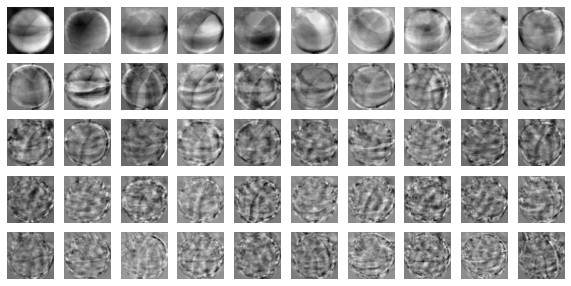

In [26]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [27]:
#주성분을 찾았으므로 원본데이터를 주성분에 투영
#특성의 개수를 10,000개 -> 50개로 줄이기 
#PCA의 transform()메서드를 사용해 원본 데이터의 차원을 50으로 축소 

print(fruits_2d.shape)

(300, 10000)


fruits_2d는 (300, 10000) 크기의 배열이였음 

10000개의 픽셀(특성)을 가진 300개의 이미지 

In [28]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [29]:
### 원본데이터 재구성 

#50개로 차원이 축소한 fruits_pca 데이터를 10,000개의 특성을 복원 

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


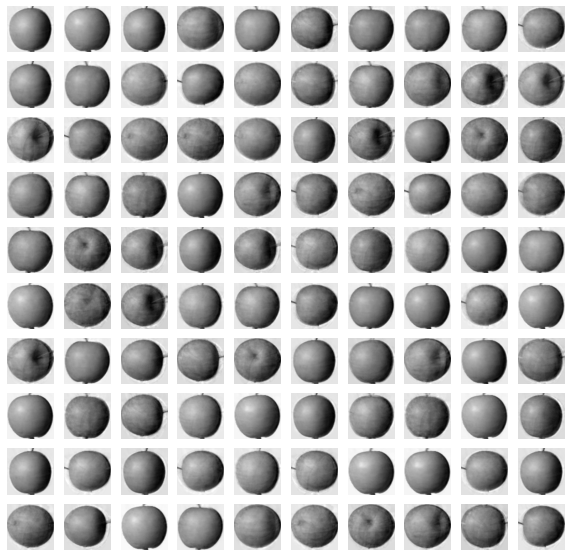

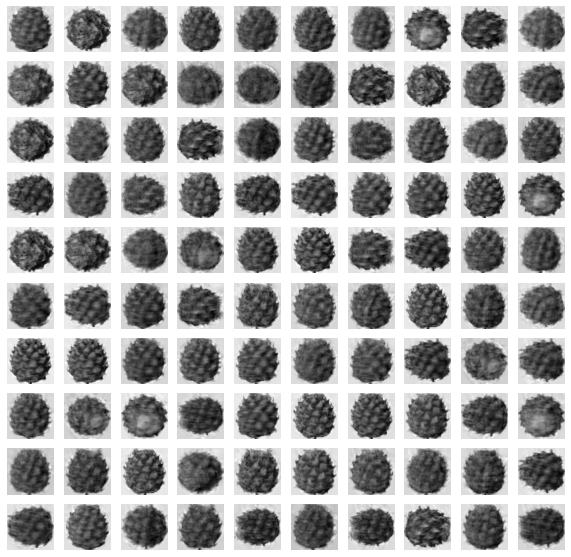

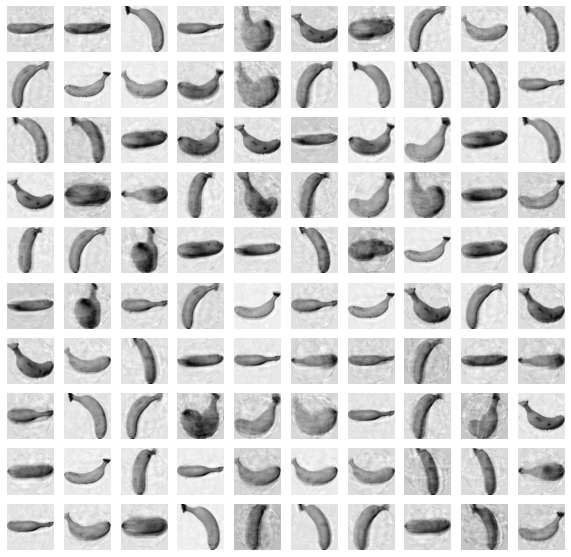

In [30]:
#100 x 100, 크기로 바꾸어 100개씩 나누어 출력 
# 사과 파인애플 바나나를 100개씩 담고 있음 


fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [31]:
#설명된 분산 비율알아보기 
print(np.sum(pca.explained_variance_ratio_))

0.9215580269514764


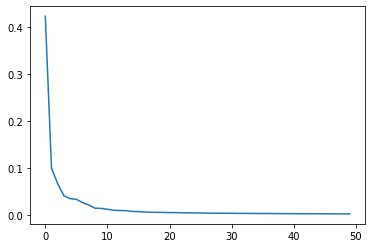

In [32]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있음, 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다

In [33]:
###PCA로 차원이 축소된 데이터를 사용, 지도학습 모델을 훈련하기 

#3개의 과일 사진을 분류해야하므로 로지스틱 회귀모델을 사용 
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

In [34]:
#파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복 
#100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 쉽게 만듦 
target = np.array([0]*100 + [1]*100 + [2]*100)

In [35]:
#원본 데이터 fruits_2d 사용
#로지스틱 회귀 모델에서 성능을 가늠 

from sklearn.model_selection import cross_validate 
scores= cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9131810665130615


교차 검증의 점수는 0.997 정도로 매우 높음 

특성이 10,00개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉬움 

fit_time항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음 -> 0.83

In [36]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03161277770996094


50개의 특성을 사용했는데 정확도 100%

훈련시간은 0.1초로 나왔음 

-> PCA로 훈련 데이터를 차원축소하면 저장공간 뿐만 아니라 머신러닝의 훈련 속도를 높일 수 있음 

In [37]:
#설명된 분산의 50%에 달하는 주성분을 찾도록 PCA모델을 만들기 
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [38]:
#몇개의 주성분을 찾았는지 확인 
print(pca.n_components_)

2


2개의 특성만으로 원본 데이터에 있는 분산 50%, 표현가능

In [40]:
#원본데이터 변환 
#주성분 2개 , 변환된 데이터 크기 (300,2)

fruits_pca= pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [42]:
#교차 검증 결과 확인
scores= cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03436379432678223


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2개의 특성을 사용하여 99%의 정확도를 얻어냄 


In [43]:
#k-평균 알고리즘으로 클러스터를 찾아냄 

from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca) 
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


fruits_pca로 찾은 클러스터는 각각 110, 99, 91개의 샘플을 포함중

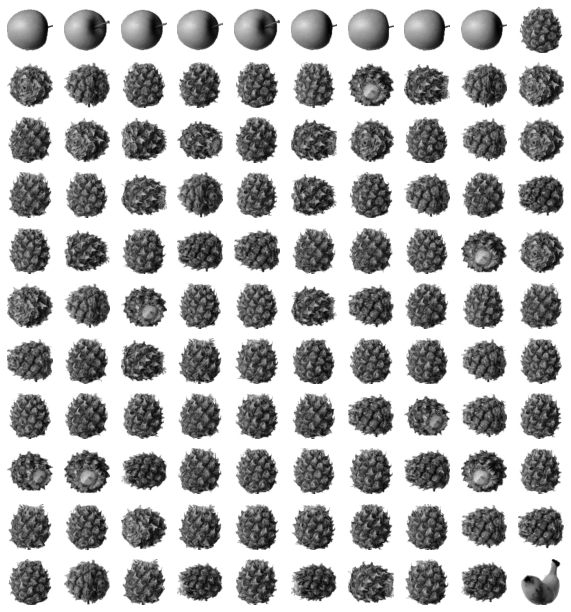

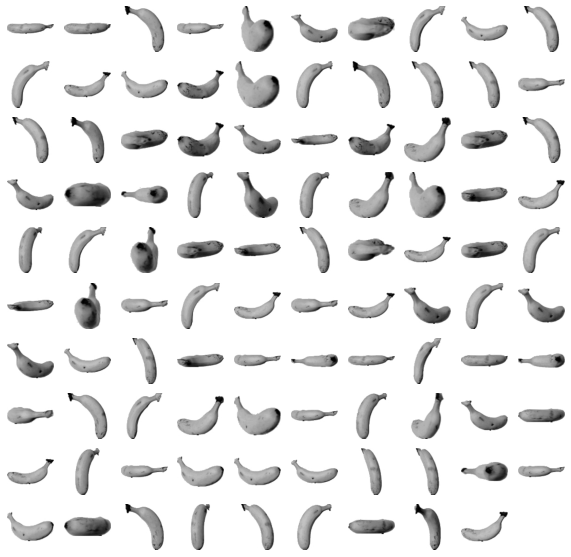

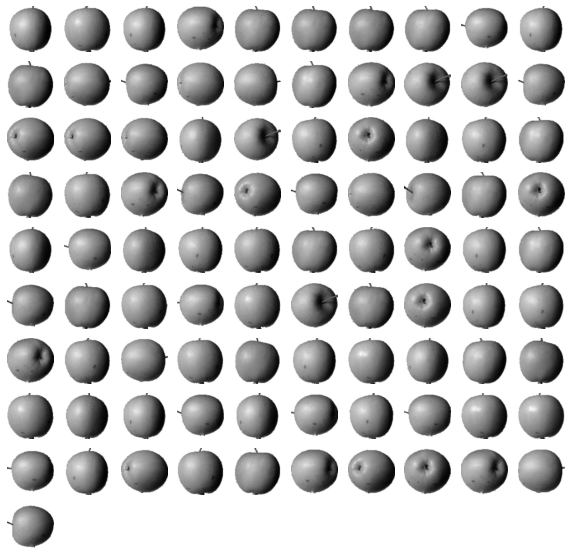

In [45]:
#KMeans가 찾은 레이블을 통해 과일이미지를 출력 

for label in range (0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

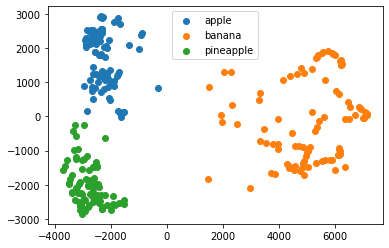

In [46]:
#3개 이하로 차원을 줄이면 시각화가 편함 
#km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보기 

for label in range(0,3):
  data= fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

-> 클러스터의 산점도 중 사과와 파인애플의 경계가 가깝게 붙어 있기 때문에 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬울듯함 